<a href="https://colab.research.google.com/github/JANANI-B-S/Fraud-detection-/blob/main/Fraud_detection_model_using_Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas matplotlib seaborn scikit-learn

In [ ]:
import pandas as pd

# Load dataset from a file
  # This will allow you to upload the CSV file

# Read the dataset
df = pd.read_csv('/content/sample_data/creditcard.csv')  # Replace with your file name
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35742 entries, 0 to 35741
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    35742 non-null  int64  
 1   V1      35742 non-null  float64
 2   V2      35742 non-null  float64
 3   V3      35742 non-null  float64
 4   V4      35742 non-null  float64
 5   V5      35742 non-null  float64
 6   V6      35741 non-null  float64
 7   V7      35741 non-null  float64
 8   V8      35741 non-null  float64
 9   V9      35741 non-null  float64
 10  V10     35741 non-null  float64
 11  V11     35741 non-null  float64
 12  V12     35741 non-null  float64
 13  V13     35741 non-null  float64
 14  V14     35741 non-null  float64
 15  V15     35741 non-null  float64
 16  V16     35741 non-null  float64
 17  V17     35741 non-null  float64
 18  V18     35741 non-null  float64
 19  V19     35741 non-null  float64
 20  V20     35741 non-null  float64
 21  V21     35741 non-null  float64
 22

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,35742.000000,35742.000000,35742.000000,35742.000000,35742.000000,35742.000000,35741.000000,35741.000000,35741.000000,35741.000000,...,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000
mean,23997.300823,-0.208427,0.072579,0.718292,0.195733,-0.216686,0.095575,-0.116847,0.032755,0.259459,...,-0.030876,-0.113555,-0.041571,0.007469,0.135958,0.021813,0.010836,0.003834,84.203356,0.002882
std,12423.654094,1.836736,1.540565,1.540896,1.409063,1.388746,1.310633,1.257788,1.242285,1.238161,...,0.769829,0.640398,0.545241,0.593343,0.435886,0.506559,0.388306,0.302016,227.279858,0.053606
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.438650,-8.567638,-9.617915,0.000000,0.000000
25%,12283.500000,-0.960139,-0.499301,0.244741,-0.714475,-0.818199,-0.644998,-0.598057,-0.155602,-0.523422,...,-0.239644,-0.536461,-0.178485,-0.326932,-0.127310,-0.331727,-0.063200,-0.007248,6.990000,0.000000
50%,28992.000000,-0.234480,0.114024,0.827554,0.188607,-0.255034,-0.163054,-0.073069,0.043456,0.135169,...,-0.081611,-0.087516,-0.051996,0.061818,0.175722,-0.063275,0.008848,0.021087,22.000000,0.000000
75%,34258.000000,1.162263,0.755015,1.456358,1.078531,0.302991,0.485169,0.436560,0.307599,0.991696,...,0.094995,0.296665,0.076214,0.398791,0.421085,0.301153,0.086772,0.076006,76.000000,0.000000
max,38241.000000,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,13.876221,4.014444,5.525093,3.517346,11.135740,5.678671,7879.420000,1.000000


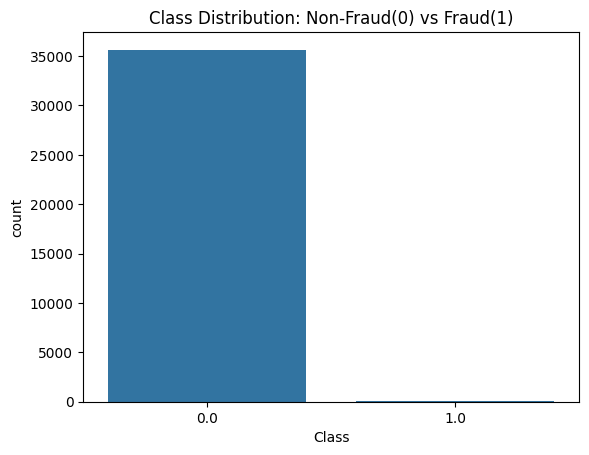

Class
0.0    99.711816
1.0     0.288184
Name: proportion, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot class distribution
sns.countplot(x='Class', data=df)
plt.title('Class Distribution: Non-Fraud(0) vs Fraud(1)')
plt.show()

# Class balance
fraud_percentage = df['Class'].value_counts(normalize=True) * 100
print(fraud_percentage)

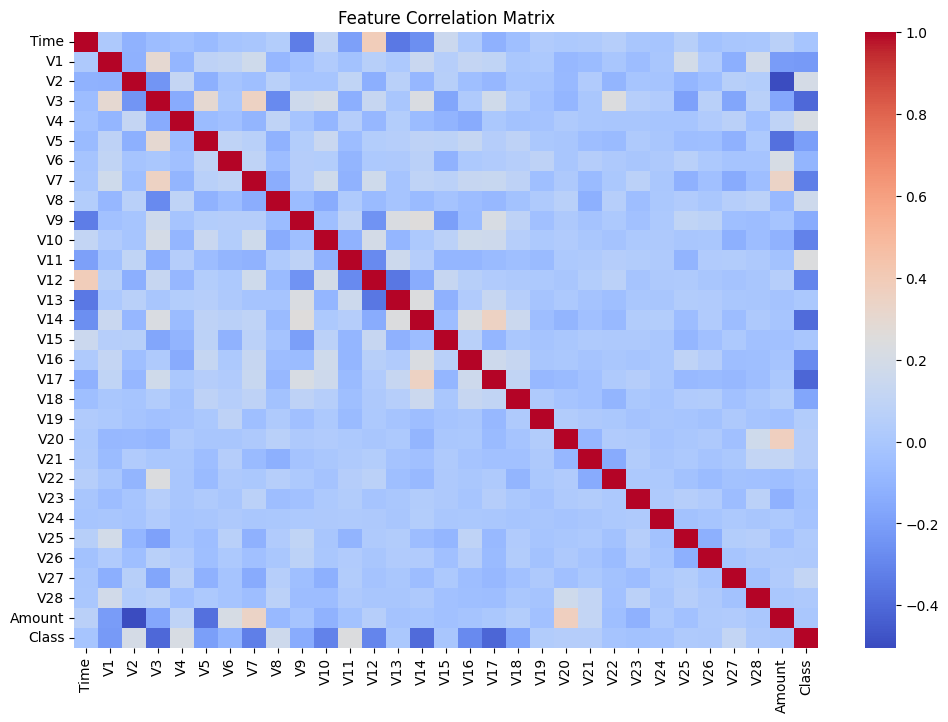

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Apply StandardScaler to normalize the 'Amount' and 'Time' columns
df['Amount_scaled'] = StandardScaler().fit_transform(df[['Amount']])
df['Time_scaled'] = StandardScaler().fit_transform(df[['Time']])

# Drop original columns
df = df.drop(columns=['Amount', 'Time'])

In [ ]:
X = df.drop(columns=['Class'])
y = df['Class']

In [ ]:
# Check for missing values in the target column 'y'
missing_values = y.isnull().sum()
print(f'Missing values in y: {missing_values}')

Missing values in y: 1


In [ ]:
# Drop rows where y has missing values
df_cleaned = df.dropna(subset=['Class'])

# Update X and y after removing missing values
X = df_cleaned.drop(columns=['Class'])
y = df_cleaned['Class']

In [ ]:
# Impute missing values with a constant (e.g., assuming non-fraudulent)
y.fillna(0, inplace=True)  # Replace NaN values with 0 (non-fraudulent)

<ipython-input-14-9762fadcc21b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.fillna(0, inplace=True)  # Replace NaN values with 0 (non-fraudulent)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data after handling NaN values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.9993006014827248
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7128
         1.0       0.94      0.81      0.87        21

    accuracy                           1.00      7149
   macro avg       0.97      0.90      0.94      7149
weighted avg       1.00      1.00      1.00      7149

Confusion Matrix:
 [[7127    1]
 [   4   17]]


In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Resample the data
X_res, y_res = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print(y_res.value_counts())

Class
0.0    28510
1.0    28510
Name: count, dtype: int64


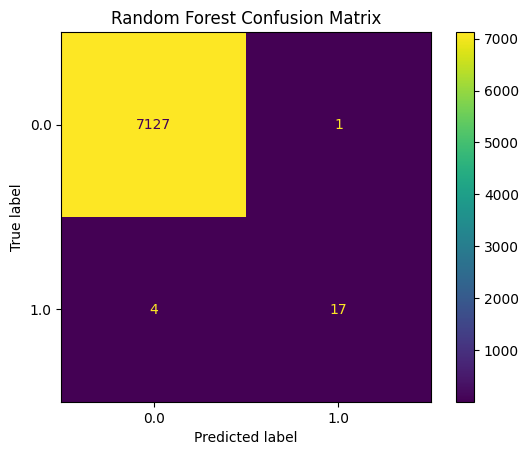

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)
plt.title('Random Forest Confusion Matrix')
plt.show()

In [ ]:
import joblib

# Save the model
joblib.dump(rf_model, 'fraud_detection_model.pkl')

# To load the model later
# model = joblib.load('fraud_detection_model.pkl')

['fraud_detection_model.pkl']